# **LOADING THE DATASET**

In [1]:
import pandas as pd
import csv

# Define the file path
file_path = 'spam.csv'

# Initialize lists to store labels and messages
labels = []
messages = []

# Read the file using the csv module
with open(file_path, 'r', encoding='ISO-8859-1') as file:
    reader = csv.reader(file)
    # Skip the header
    next(reader)
    for row in reader:
        # Append the label and message
        labels.append(row[0])
        # Join the remaining columns in case there are commas in the message
        messages.append(','.join(row[1:]))

# Create the DataFrame
sms_data = pd.DataFrame({'label': labels, 'message': messages})

In [2]:
# Display the DataFrame
sms_data.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,"Ok lar... Joking wif u oni...,,,"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


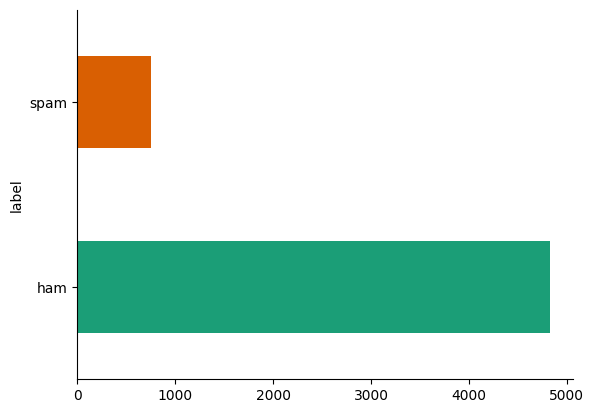

In [3]:
from matplotlib import pyplot as plt
import seaborn as sns
sms_data.groupby('label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

# **TEXT PREPROCESSING**

In [4]:
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()

In [5]:
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [6]:
from nltk.corpus import stopwords

In [7]:
corpus=[]
for i in range(0,len(messages)):
    review=re.sub('[^a-zA-z]',' ',sms_data['message'][i])
    review=review.lower()
    review=review.split()
    review=[lemmatizer.lemmatize(word) for word in review if not word in stopwords.words('english')]
    review=' '.join(review)
    corpus.append(review)

In [8]:
corpus

['go jurong point crazy available bugis n great world la e buffet cine got amore wat',
 'ok lar joking wif u oni',
 'free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply',
 'u dun say early hor u c already say',
 'nah think go usf life around though',
 'freemsg hey darling week word back like fun still tb ok xxx std chgs send rcv',
 'even brother like speak treat like aid patent',
 'per request melle melle oru minnaminunginte nurungu vettam set callertune caller press copy friend callertune',
 'winner valued network customer selected receivea prize reward claim call claim code kl valid hour',
 'mobile month u r entitled update latest colour mobile camera free call mobile update co free',
 'gonna home soon want talk stuff anymore tonight k cried enough today',
 'six chance win cash pound txt csh send cost p day day tsandcs apply reply hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw'

# **Train Test Split**

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
## Output Features
y=pd.get_dummies(sms_data['label'])
y=y.iloc[:,0].values

In [11]:
## Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(corpus,y,test_size=0.20,random_state=42)

In [12]:
# Convert y_train and y_test to pandas Series to use value_counts
y_train_series = pd.Series(y_train)
y_test_series = pd.Series(y_test)

# Print counts of spam and ham in training and test sets
print("\nTraining set counts:")
print(y_train_series.value_counts().rename({1: 'spam', 0: 'ham'}))

print("\nTest set counts:")
print(y_test_series.value_counts().rename({1: 'spam', 0: 'ham'}))


Training set counts:
spam    3860
ham      597
Name: count, dtype: int64

Test set counts:
spam    965
ham     150
Name: count, dtype: int64


# **Creating The TF-IDF Mode**

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
tv=TfidfVectorizer(max_features=2500,ngram_range=(1,2))
X_train_tf_idf=tv.fit_transform(X_train).toarray()
X_test_tf_idf=tv.transform(X_test).toarray()

In [14]:
X_train_tf_idf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [15]:
tv.vocabulary_

{'still': 1978,
 'mom': 1324,
 'check': 325,
 'yo': 2492,
 'half': 874,
 'bank': 140,
 'issue': 1022,
 'strong': 2002,
 'buy': 226,
 'pick': 1558,
 'member': 1264,
 'per': 1536,
 'giving': 791,
 'second': 1804,
 'chance': 312,
 'lt': 1201,
 'gt': 848,
 'lt gt': 1203,
 'private': 1637,
 'account': 8,
 'statement': 1972,
 'show': 1868,
 'un': 2219,
 'redeemed': 1708,
 'point': 1604,
 'call': 238,
 'identifier': 976,
 'code': 361,
 'expires': 641,
 'private account': 1638,
 'account statement': 9,
 'statement show': 1973,
 'show un': 1870,
 'un redeemed': 2220,
 'redeemed point': 1709,
 'point call': 1605,
 'call identifier': 247,
 'identifier code': 977,
 'code expires': 362,
 'say': 1788,
 'never': 1398,
 'answer': 60,
 'text': 2077,
 'confirm': 403,
 'lost': 1183,
 'pound': 1617,
 'help': 903,
 'bit': 174,
 'stuff': 2006,
 'come': 381,
 'people': 1534,
 'wah': 2307,
 'lucky': 1208,
 'man': 1227,
 'save': 1786,
 'money': 1328,
 'hee': 899,
 'much': 1362,
 'better': 163,
 'thanks': 2091,

# Naive Byes

In [16]:
from sklearn.naive_bayes import MultinomialNB
spam_tfidf_model = MultinomialNB().fit(X_train_tf_idf, y_train)

In [17]:
y_pred_tf_idf_nb=spam_tfidf_model.predict(X_test_tf_idf)

In [18]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred_tf_idf_nb)
print(score)

0.9730941704035875


In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_pred_tf_idf_nb,y_test))

              precision    recall  f1-score   support

       False       0.81      0.98      0.89       124
        True       1.00      0.97      0.98       991

    accuracy                           0.97      1115
   macro avg       0.91      0.98      0.94      1115
weighted avg       0.98      0.97      0.97      1115



# Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression
logistic=LogisticRegression(penalty='l2', solver='liblinear')
logistic.fit(X_train_tf_idf,y_train)

LogisticRegression(solver='liblinear')

In [21]:
y_pred_tf_idf_lr=logistic.predict(X_test_tf_idf)


In [22]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
score=accuracy_score(y_pred_tf_idf_lr,y_test)
print(score)
print(classification_report(y_pred_tf_idf_lr,y_test))
print(confusion_matrix(y_pred_tf_idf_lr,y_test))

0.968609865470852
              precision    recall  f1-score   support

       False       0.78      0.98      0.87       119
        True       1.00      0.97      0.98       996

    accuracy                           0.97      1115
   macro avg       0.89      0.98      0.93      1115
weighted avg       0.97      0.97      0.97      1115

[[117   2]
 [ 33 963]]


# Support Vector Machine

In [23]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
classifier = SVC()
classifier.fit(X_train_tf_idf, y_train)


SVC()

In [24]:
# Accuracy on test set
y_pred_tf_idf_svm = classifier.predict(X_test_tf_idf)
accuracy_score(y_test, y_pred_tf_idf_svm)

0.979372197309417

In [25]:
# Accuracy on train set
y_pred_tf_idf_svm_train = classifier.predict(X_train_tf_idf)
accuracy_score(y_train, y_pred_tf_idf_svm_train)

0.9966345075162666

In [26]:
print(classification_report(y_pred_tf_idf_svm,y_test))
print(confusion_matrix(y_pred_tf_idf_svm,y_test))

              precision    recall  f1-score   support

       False       0.86      0.98      0.92       131
        True       1.00      0.98      0.99       984

    accuracy                           0.98      1115
   macro avg       0.93      0.98      0.95      1115
weighted avg       0.98      0.98      0.98      1115

[[129   2]
 [ 21 963]]
